# Work Sample Task: People Analytics - Attrition Prediction

Name: Kaitlyn Shi

Date: August 18, 2024

## Data Dictionary
Age: The age of the employee. (Numerical)

Attrition: Whether or not the employee has left the organization. (Categorical)

BusinessTravel: The frequency of business travel for the employee. (Categorical)

DailyRate: The daily rate of pay for the employee. (Numerical)

Department: The department the employee works in. (Categorical)

DistanceFromHome: The distance from home in miles for the employee. (Numerical)

Education: The level of education achieved by the employee. (Categorical)

EducationField: The field of study for the employee's education. (Categorical)

EmployeeCount: The total number of employees in the organization. (Numerical)

EmployeeNumber: A unique identifier for each employee profile. (Numerical)

EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)

Gender: The gender of the employee. (Categorical)

HourlyRate: The hourly rate of pay for the employee. (Numerical)

JobInvolvement: The level of involvement required for the employee's job. (Categorical)

JobLevel: The job level of the employee. (Categorical)

JobRole: The role of the employee in the organization. (Categorical)

JobSatisfaction: The employee's satisfaction with their job. (Categorical)

MaritalStatus: The marital status of the employee. (Categorical)

MonthlyIncome: The monthly income of the employee. (Numerical)

MonthlyRate: The monthly rate of pay for the employee. (Numerical)

NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)

Over18: Whether or not the employee is over 18. (Categorical)

OverTime: Whether or not the employee works overtime. (Categorical)

PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)

PerformanceRating: The performance rating of the employee. (Categorical)

RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)

StandardHours: The standard hours of work for the employee. (Numerical)

StockOptionLevel: The stock option level of the employee. (Numerical)

TotalWorkingYears: The total number of years the employee has worked. (Numerical)

TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)

WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)

YearsAtCompany: The number of years the employee has been with the company. (Numerical)

YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)

YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)

YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

Year, Quarter, Month, Day (Categorical)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time 
import random
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## 1. Load Dataset

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/Kaitlynnnnn/HR-Analytics/main/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Data Cleaning and Preprocessing

In [41]:
# Define the number of rows
n_rows = 1470

# Define the quarters and their corresponding weights
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
weights = [0.4, 0.3, 0.2, 0.1]

# Generate random quarters based on the weights
random_quarters = np.random.choice(quarters, size=n_rows, p=weights)

# Define the months for each quarter
months = {
    'Q1': [1, 2, 3],
    'Q2': [4, 5, 6],
    'Q3': [7, 8, 9],
    'Q4': [10, 11, 12]
}

# Generate random months based on the quarters
random_months = np.array([np.random.choice(months[quarter]) for quarter in random_quarters])

# Generate random days (assuming all months have 30 days for simplicity)
random_days = np.random.randint(1, 31, size=n_rows)

# Generate random years (assuming all dates are in the year 2022)
random_years = np.repeat(2023, n_rows)

# Add the generated date columns to the existing DataFrame
df['Year'] = random_years
df['Quarter'] = random_quarters
df['Month'] = random_months
df['Day'] = random_days

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year,Quarter,Month,Day
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,2023,Q2,6,17
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,2023,Q1,3,22
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,2023,Q1,3,16
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,2023,Q1,1,29
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,2023,Q1,1,5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
df[["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "Year", "Month", "Day"]] = df[["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "Year", "Month", "Day"]].astype('object')

## 3. Exploratory Data Analysis (EDA)

In [44]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year,Quarter,Month,Day
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.0,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470,1470.0,1470.0
unique,NaN,2,3,NaN,3,NaN,5.0,6,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,1.0,4,12.0,30.0
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,3.0,Life Sciences,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,2023.0,Q1,2.0,16.0
freq,NaN,1233,1043,NaN,961,NaN,572.0,606,NaN,NaN,...,NaN,893.0,NaN,NaN,NaN,NaN,1470.0,593,218.0,61.0
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,1.0,1024.865306,...,2.799320,NaN,7.008163,4.229252,2.187755,4.123129,NaN,NaN,NaN,NaN
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,0.0,602.024335,...,1.289271,NaN,6.126525,3.623137,3.222430,3.568136,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,1.0,1.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,1.0,491.250000,...,2.000000,NaN,3.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,1.0,1020.500000,...,3.000000,NaN,5.000000,3.000000,1.000000,3.000000,NaN,NaN,NaN,NaN
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,1.0,1555.750000,...,3.000000,NaN,9.000000,7.000000,3.000000,7.000000,NaN,NaN,NaN,NaN


### Q1: Which department have the highest attrition rate?

In [45]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df_dept = df.groupby('Department')['Attrition'].mean().reset_index()
df_dept

,Department,Attrition
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


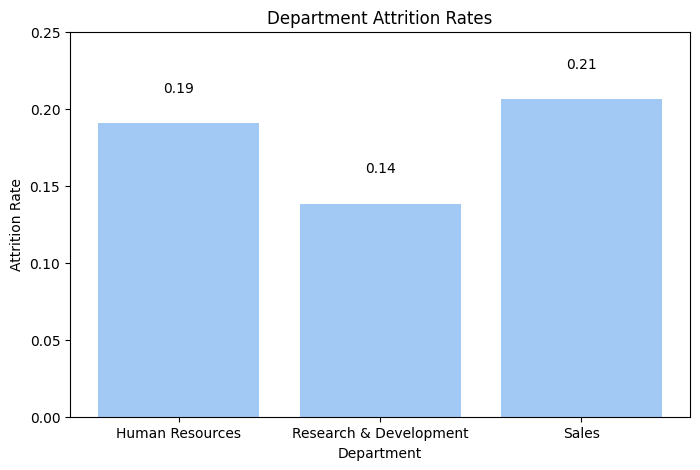

In [46]:
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(8,5))
plt.bar(df_dept['Department'], df_dept['Attrition'])
plt.title('Department Attrition Rates')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.25))
for i, rate in enumerate(df_dept['Attrition']):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

The **Sales** department appears to have the highest attrition. To reduce the attrition rate, it is necessary to analyze the causes.

### Q2: Which departments do employees with high salaries usually work in?

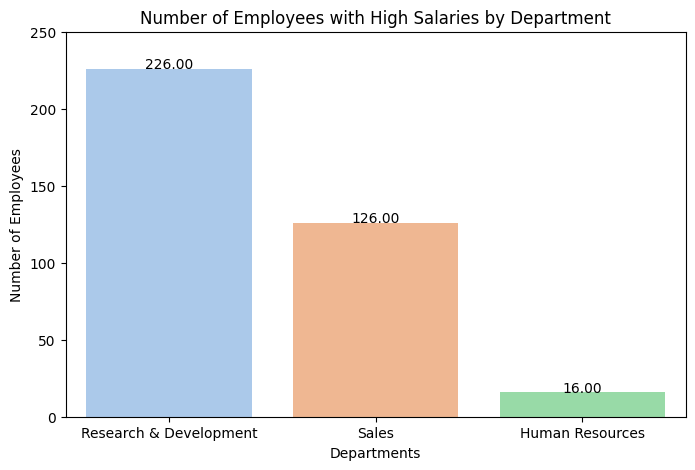

In [47]:
high_income = df[df['MonthlyIncome'] > df['MonthlyIncome'].quantile(0.75)]

department_counts = high_income['Department'].value_counts()

sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(8,5))
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Number of Employees with High Salaries by Department')
plt.xlabel('Departments')
plt.ylabel('Number of Employees')
plt.ylim((0, 250))
for i, rate in enumerate(department_counts):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

From the graph, we find that employees in the Research & Development department gain higher salaries.

### Q3: Which education level do employees with higher salaries have?

In [48]:
education_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
education_level

,Education,MonthlyIncome
0,1,5640.570588
1,2,6226.645390
2,3,6517.263986
3,4,6832.402010
4,5,8277.645833


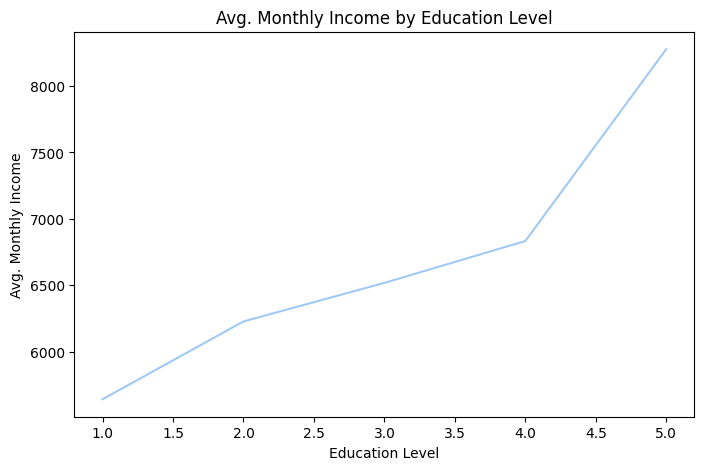

In [49]:
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(8,5))
plt.plot(education_level['Education'], education_level['MonthlyIncome'])
plt.xlabel('Education Level')
plt.ylabel('Avg. Monthly Income')
plt.title('Avg. Monthly Income by Education Level')
plt.show()

From the above line chart, it tells that as the education level increases, the average monthly income increases. Therefore, employees with higher education levels usually receive higher salaries.

### Q4: Is there a relationship between job satisfaction and attrition rates?

In [50]:
satisfy_att = df.groupby(['JobSatisfaction', 'Attrition'])['Attrition'].count().unstack()

# Calculate Attrition Rate for each group
satisfy_att['Attrition Rate'] = satisfy_att[1] / (satisfy_att[1] + satisfy_att[0])
satisfy_att

Attrition,0,1,Attrition Rate
JobSatisfaction,,,
1,223,66,0.228374
2,234,46,0.164286
3,369,73,0.165158
4,407,52,0.113290


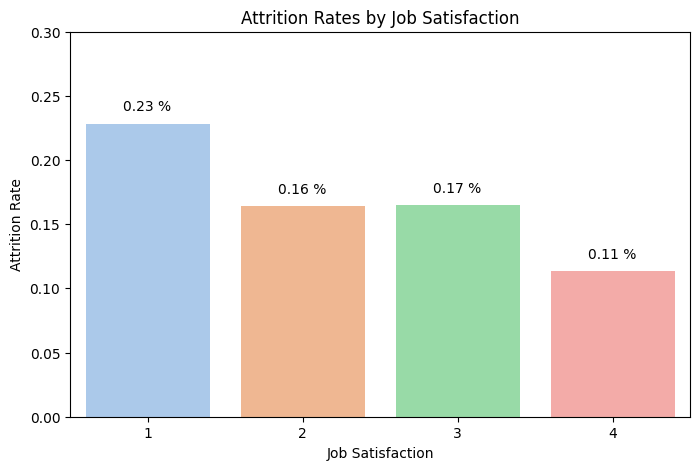

In [51]:
sns.set_palette(sns.color_palette("pastel"))
plt.figure(figsize=(8,5))
sns.barplot(x=satisfy_att.index, y=satisfy_att['Attrition Rate'])
plt.title('Attrition Rates by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.3))
for i, rate in enumerate(satisfy_att['Attrition Rate']):
    plt.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

The above graph shows some significance of Job Satisfaction. Therefore, next we need to use statistical tests to prove it.

#### Correlation Test

In [52]:
correlation = df["JobSatisfaction"].corr(df["Attrition"])
print("Correlation (Job Satisfaction & Attrition Rate): ", correlation)

Correlation (Job Satisfaction & Attrition Rate):  -0.10348112606902155


Since correaltion test is used to determine whether there's any linear realtionship between two variables. The -0.10 value indicates that there's no significant linear relationship between Job Satisfaction and Attrition Rate. Next, let's try T-test.

#### T-test

In [53]:
# T-test only works for binary categorical variable
satisfied = df[df["JobSatisfaction"] >= 3]
not_satisfied = df[df["JobSatisfaction"] < 3]

t_statistic, p_value = ttest_ind(satisfied["Attrition"], not_satisfied["Attrition"])

print("T-test statistics: ", t_statistic)
print("p-value: ", p_value)

T-test statistics:  -2.957368420952157
p-value:  0.0031523745372399555


Now, we can see that the p-value (0.003) is small enough to say that there's a relationship between Job Satisfaction and Attrition Rates. Our hypothesis is true.

## 4. Feature Engineering

In [54]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Year', 'Quarter', 'Month', 'Day'],
      dtype='object')

In [55]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Year', 'Quarter', 'Month', 'Day']
target = ['Attrition']

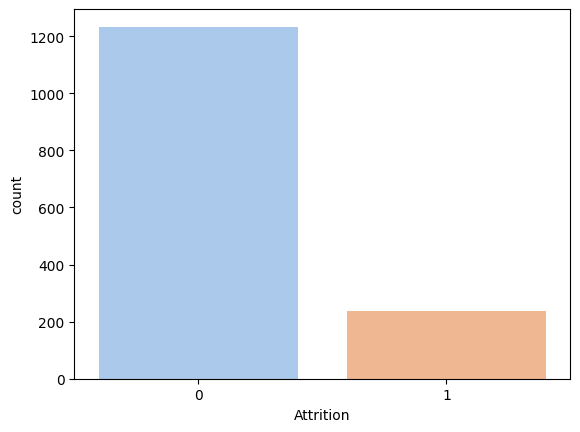

In [56]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(x="Attrition", data=df)
plt.show()

### Plot Numerical Features

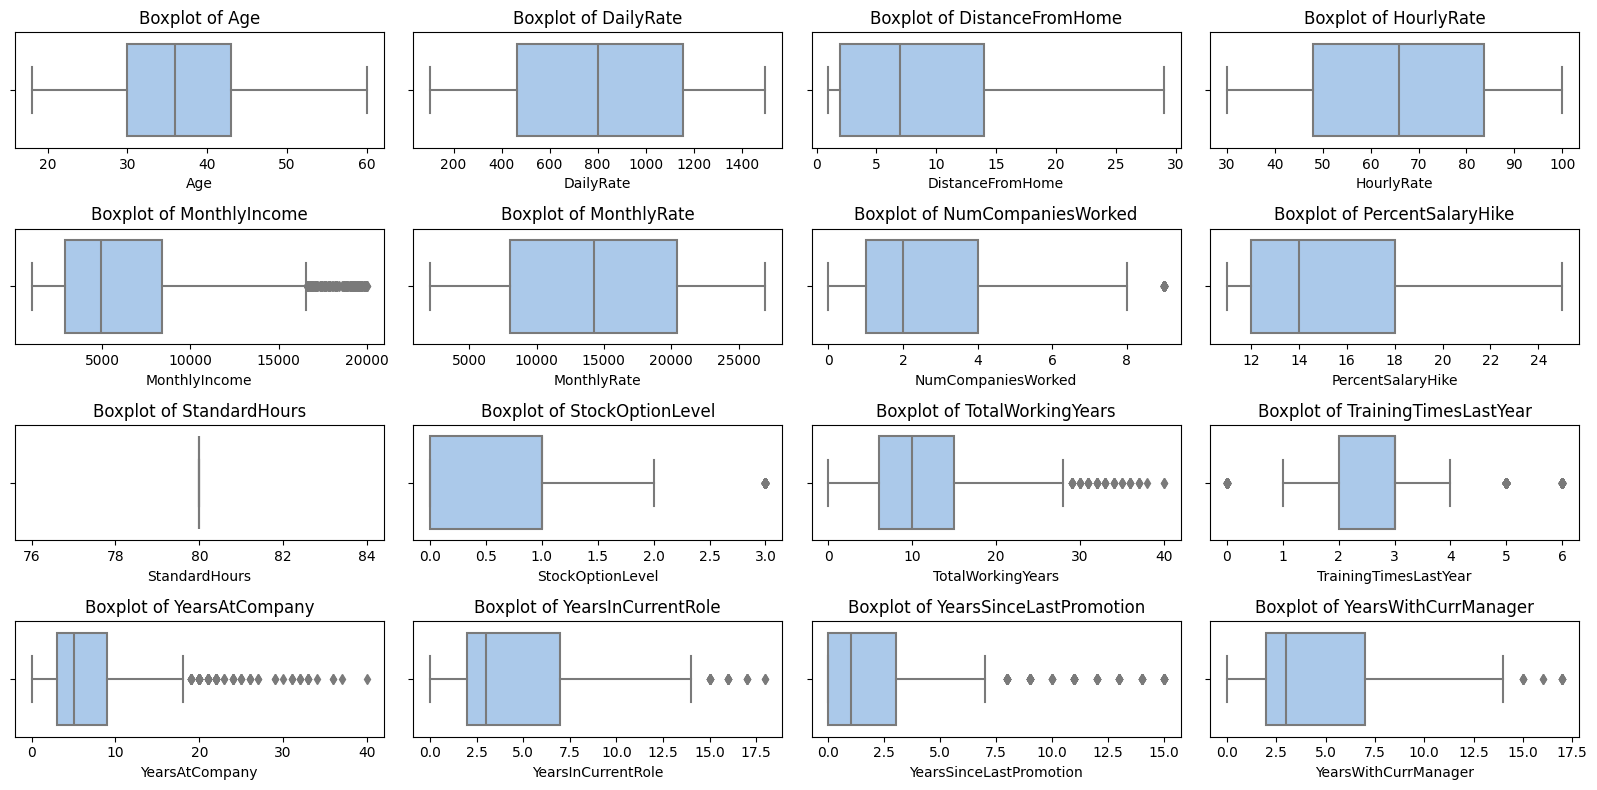

In [57]:
sns.set_palette(sns.color_palette("pastel"))
fig, axs = plt.subplots(4, 4, figsize=(16, 8))
axs = axs.flatten()

for i, var in enumerate(numerical):
    sns.boxplot(data=df, x=var, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

#### Outliers

In [58]:
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    
    for column in numerical:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()

    return df

In [59]:
df = replace_outliers(df)

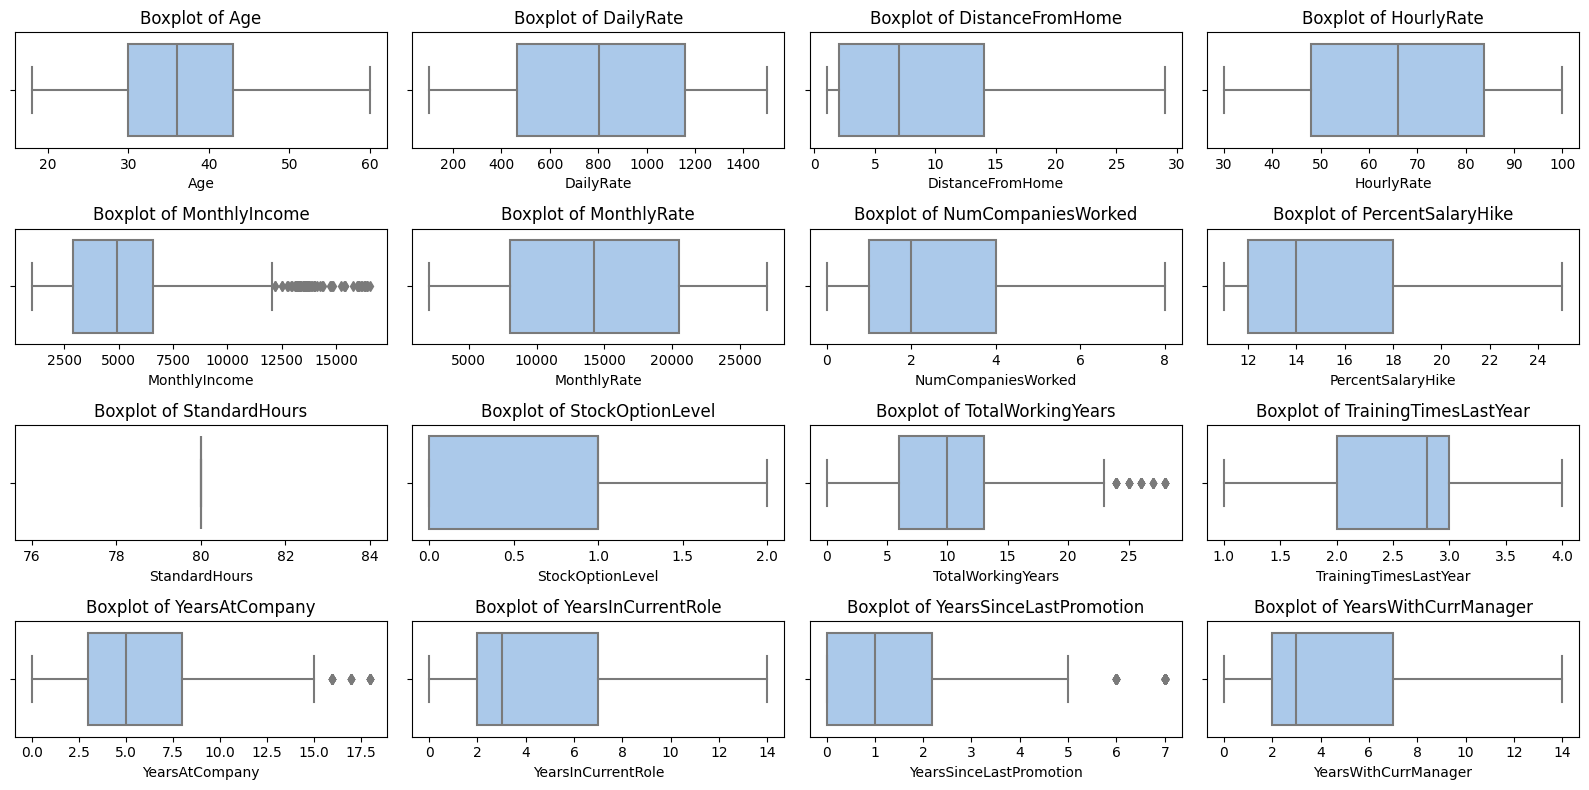

In [60]:
sns.set_palette(sns.color_palette("pastel"))
fig, axs = plt.subplots(4, 4, figsize=(16, 8))
axs = axs.flatten()

for i, var in enumerate(numerical):
    sns.boxplot(data=df, x=var, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

Remove `StandardHours` since it's the same for all employees.

### Plot Categorical Features

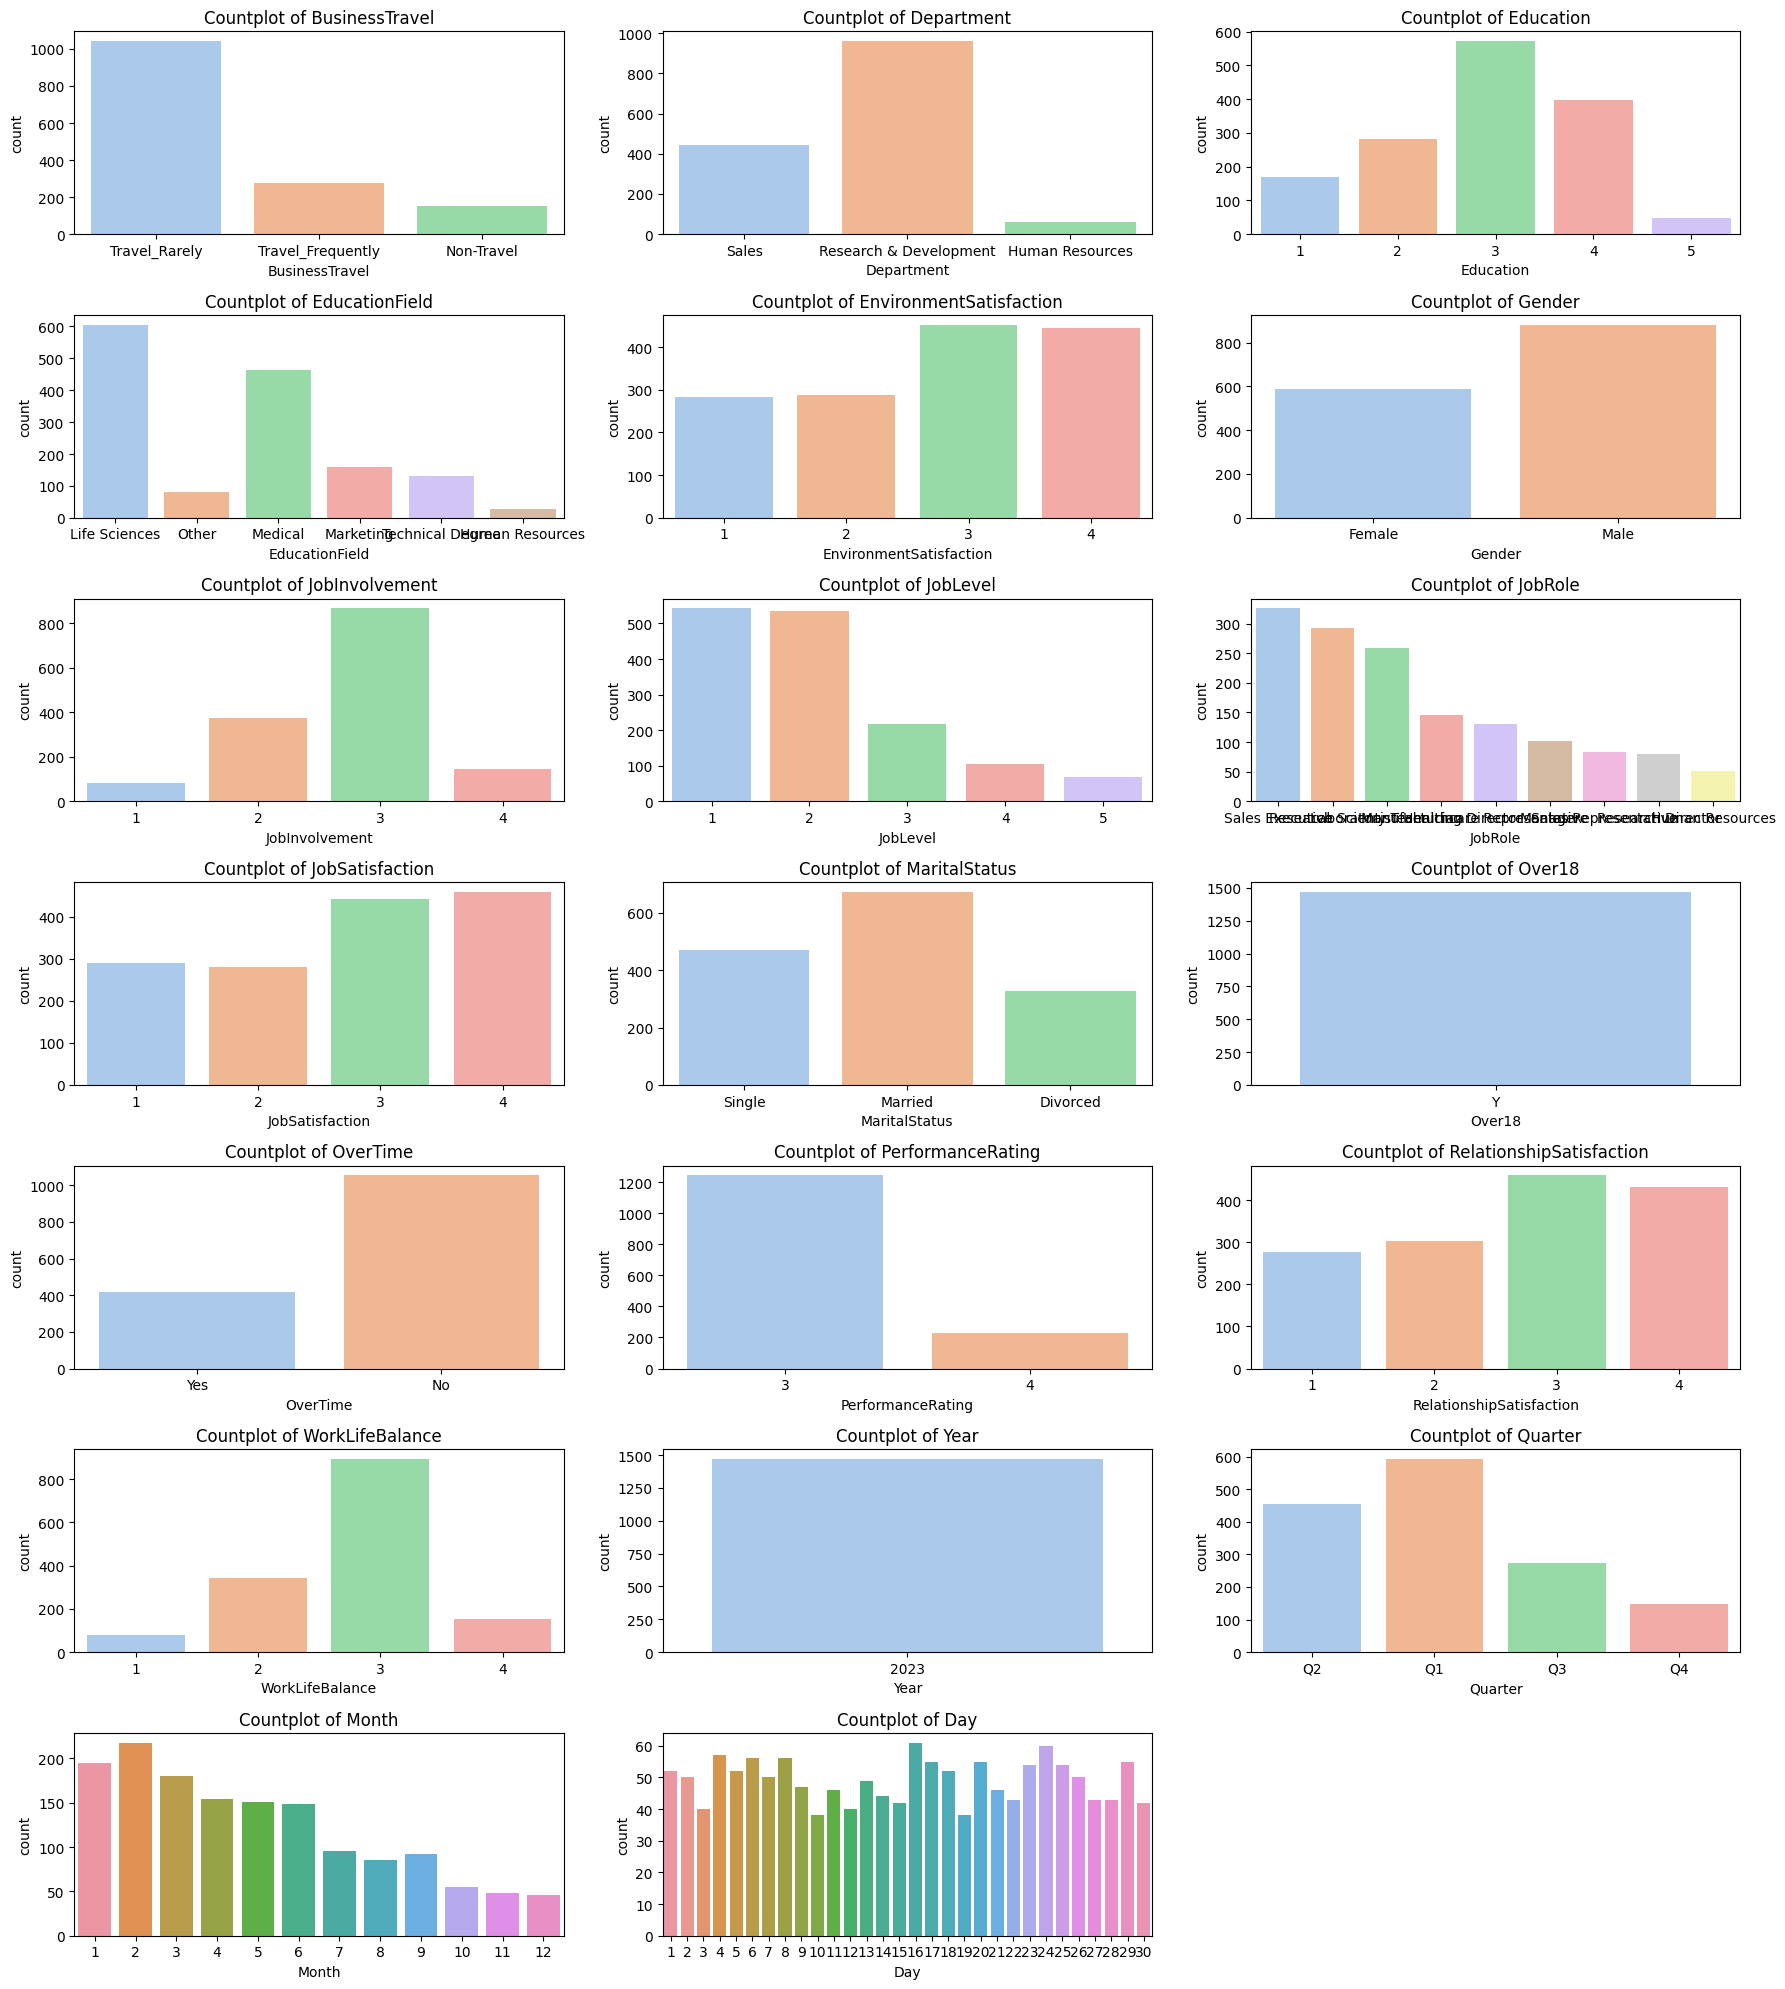

In [61]:
sns.set_palette(sns.color_palette("pastel"))

fig, axs = plt.subplots(7, 3, figsize=(18, 20))
axs = axs.flatten()

for i, var in enumerate(categorical):
    sns.countplot(data=df, x=var, ax=axs[i])

    axs[i].set_title(f"Countplot of {var}")

# Remove blank subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

## 5. Model Development

### Update Features

In [62]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Quarter', 'Month', 'Day']

### Pipeline Building

In [63]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('categorical',cat_transformer, categorical),
                                                 ('numerical', num_transformer, numerical)])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical+numerical], df[target], test_size=0.3, random_state=1)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(X_train_transformed.shape)
print(X_test_transformed.shape)

(1029, 121)
(441, 121)


### Logistic Regression, Decision Tree, Random Forest, Gradient Boosting (XGBoost)

In [65]:
# Define Models
logistic_model = LogisticRegression(random_state=1)
tree_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1, n_estimators=100)
xgb_model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

In [66]:
classifiers_baseline = {
    'Logistic Regression': logistic_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

In [67]:
results_baseline = {}

In [68]:
for name, clf in classifiers_baseline.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results_baseline[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_bl_df = pd.DataFrame(results_baseline).T
results_bl_df

,Precision,Recall,F1-Score,Accuracy,Time (s)
Logistic Regression,0.666667,0.441558,0.531250,0.863946,0.044787
Decision Tree,0.346667,0.337662,0.342105,0.773243,0.037896
Random Forest,0.727273,0.103896,0.181818,0.836735,0.223741
XGBoost,0.675676,0.324675,0.438596,0.854875,0.113313


### Hyperparameter Tuning

In [69]:
# Define the models and hyperparameter grids
models_and_parameters = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=1),
        'params': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=1),
        'params': {
            'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=1),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__bootstrap': [True, False]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [3, 5, 7, 10],
            'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
            'model__subsample': [0.6, 0.8, 1.0],
            'model__colsample_bytree': [0.6, 0.8, 1.0]
        }
    }
}

# Store results
results = []

# Loop through each model, perform hyperparameter tuning and store results
for model_name, model_info in models_and_parameters.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_info['model'])])
    
    # Choose between GridSearchCV and RandomizedSearchCV depending on the model
    if model_name == 'XGBoost':
        search = RandomizedSearchCV(pipeline, model_info['params'], n_iter=50, cv=5, scoring='accuracy', random_state=1, n_jobs=-1)
    else:
        search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    
    search.fit(X_train, y_train.values.ravel())
    
    # Predict using the best model
    y_pred = search.best_estimator_.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Store results
    results.append({
        'Model': model_name,
        'Best Parameters': search.best_params_,
        'Best Cross-Validation Score': search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    })

# Convert results to a DataFrame and display
results_best = pd.DataFrame(results)
results_best


Tuning hyperparameters for Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for XGBoost...


,Model,Best Parameters,Best Cross-Validation Score,Accuracy,Precision,Recall,F1-Score,Time (s)
0,Logistic Regression,"{'model__C': 0.1, 'model__solver': 'liblinear'}",0.882406,0.861678,0.766667,0.298701,0.429907,3.194500
1,Decision Tree,"{'model__criterion': 'entropy', 'model__max_de...",0.822150,0.795918,0.396825,0.324675,0.357143,5.188379
2,Random Forest,"{'model__bootstrap': False, 'model__max_depth'...",0.868799,0.839002,0.687500,0.142857,0.236559,80.570088
3,XGBoost,"{'model__subsample': 0.6, 'model__n_estimators...",0.872697,0.845805,0.615385,0.311688,0.413793,86.148296


Based on our fine-tuned results, **logistic regression** is the best model for us to predict attrition.

### Feature Importance

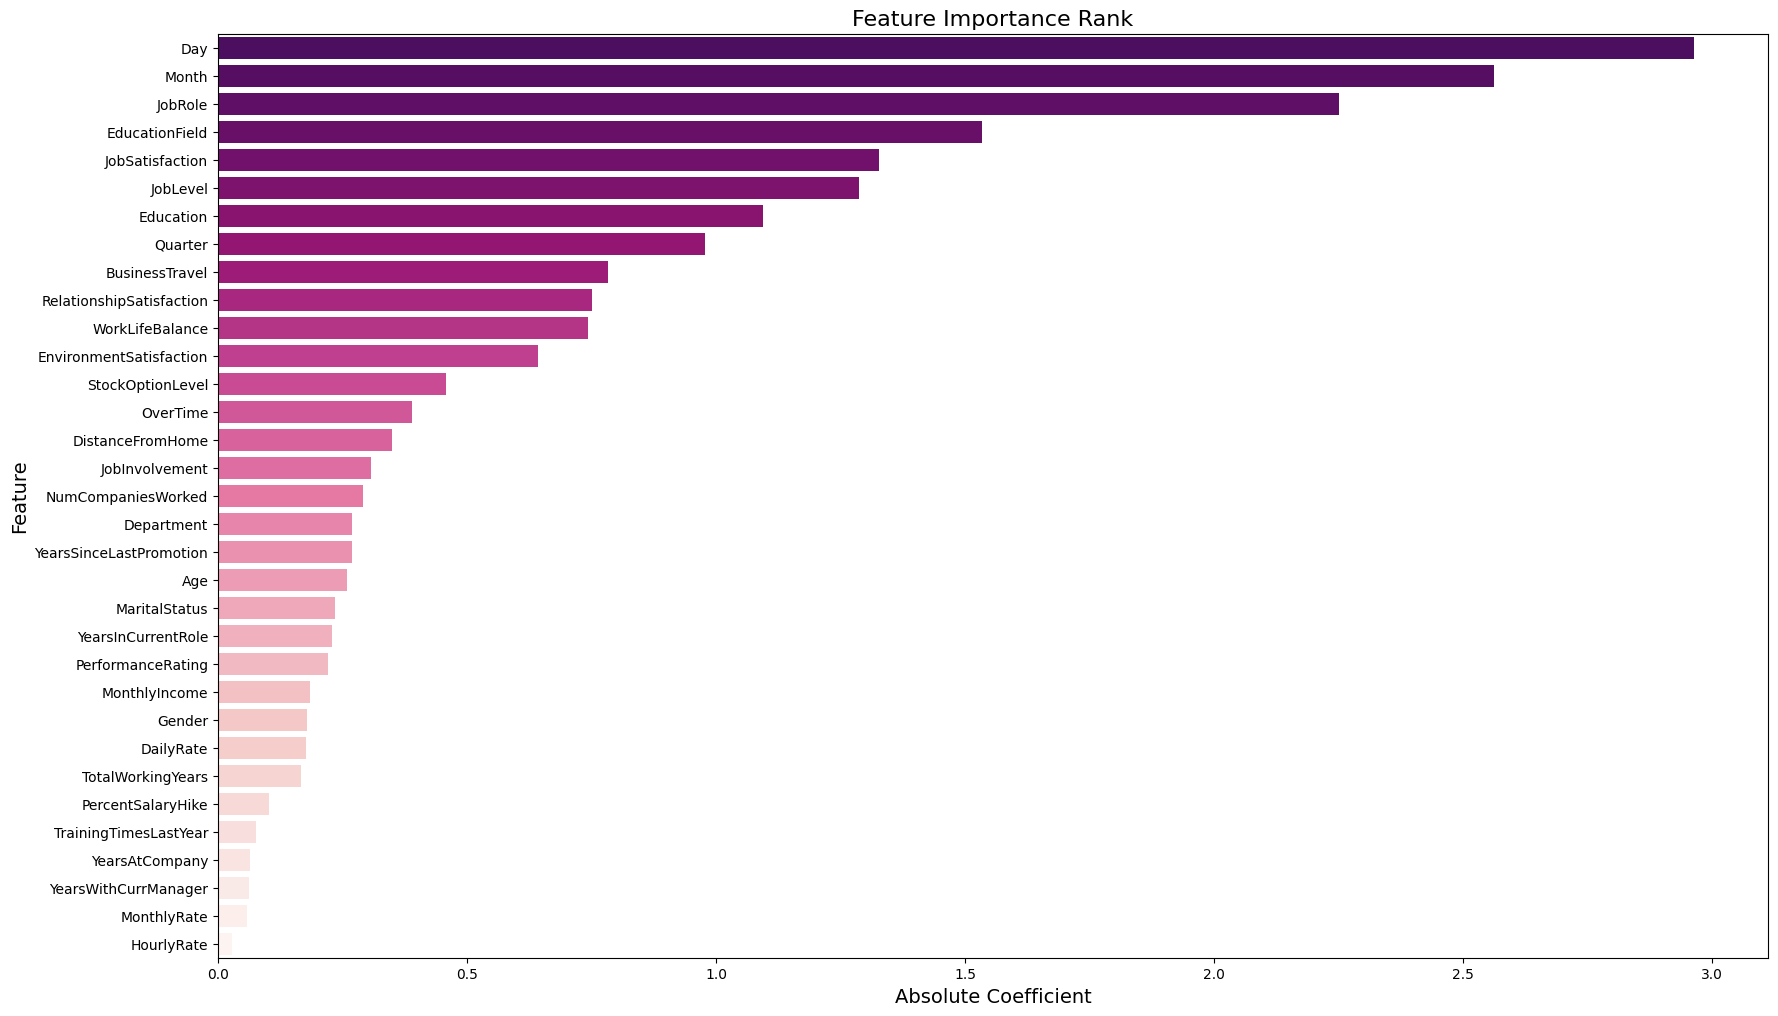


Feature Importance:

                     Feature  Absolute Coefficient
17                       Day              2.964339
16                     Month              2.562215
8                    JobRole              2.251870
3             EducationField              1.533301
9            JobSatisfaction              1.326655
7                   JobLevel              1.287815
2                  Education              1.094016
15                   Quarter              0.977104
0             BusinessTravel              0.784044
13  RelationshipSatisfaction              0.751353
14           WorkLifeBalance              0.743221
4    EnvironmentSatisfaction              0.642024
8           StockOptionLevel              0.458391
11                  OverTime              0.390150
2           DistanceFromHome              0.348456
6             JobInvolvement              0.306571
6         NumCompaniesWorked              0.290995
1                 Department              0.269571
13   Year

In [71]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Create a pipeline with the Logistic Regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, random_state=1))])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[numerical + categorical], df[target], test_size=0.3, random_state=1)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train.values.ravel())

# Extract feature names
num_features = numerical
cat_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical)
feature_names = np.concatenate([num_features, cat_features])

# Get the coefficients from the logistic regression model
coefficients = pipeline.named_steps['model'].coef_.flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Aggregate coefficients for original categorical variables
original_cat_importance = {}
for i, feature in enumerate(cat_features):
    original_cat = feature.split('_')[0]  # Extract original categorical variable name
    if original_cat not in original_cat_importance:
        original_cat_importance[original_cat] = 0
    original_cat_importance[original_cat] += np.abs(coefficients[i])

# Convert to DataFrame for original categorical variables
original_cat_df = pd.DataFrame(list(original_cat_importance.items()), columns=['Feature', 'Absolute Coefficient'])

# Combine numerical and aggregated categorical importance
num_importance_df = importance_df[importance_df['Feature'].isin(num_features)]
combined_importance_df = pd.concat([
    num_importance_df[['Feature', 'Absolute Coefficient']],  # Numerical features
    original_cat_df                                           # Aggregated categorical features
])

# Sort by absolute coefficient
combined_importance_df = combined_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Create a reversed "RdPu" color palette
palette = sns.color_palette("RdPu", n_colors=len(combined_importance_df))
reversed_palette = list(reversed(palette))

# Plot the combined feature importance
plt.figure(figsize=(20, 12))
sns.barplot(x='Absolute Coefficient', y='Feature', data=combined_importance_df, palette=reversed_palette)

# Add labels and title
plt.title('Feature Importance Rank', fontsize=16)
plt.xlabel('Absolute Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

# Display the combined feature importance
print("\nFeature Importance:\n")
print(combined_importance_df)